In [4]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [5]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

In [6]:
train_input.shape, test_input.shape

AttributeError: 'list' object has no attribute 'shape'

In [7]:
len(train_input[0])

218

In [8]:
len(train_input[1])

189

In [9]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 283,
 5,
 16,
 2,
 113,
 103,
 

In [10]:
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [11]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [12]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [13]:
np.mean(lengths), np.median(lengths)

(239.00925, 178.0)

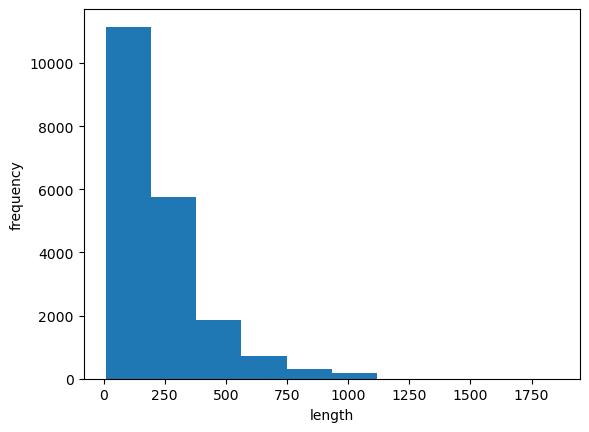

In [14]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [16]:
train_seq.shape

(20000, 100)

In [17]:
train_seq[0]

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158], dtype=int32)

In [18]:
train_input[0][-10:]

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]

In [19]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94, 205,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [20]:
val_seq = pad_sequences(val_input, maxlen=100)

In [22]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(100, 300)),
    keras.layers.SimpleRNN(8),
    keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
train_oh = keras.utils.to_categorical(train_seq)

In [24]:
train_oh.shape

(20000, 100, 300)

In [25]:
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [26]:
np.sum(train_oh[0][0])

1.0

In [27]:
val_oh = keras.utils.to_categorical(val_seq)

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │         2,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4976 - loss: 0.7088 - val_accuracy: 0.4954 - val_loss: 0.7022
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5026 - loss: 0.7014 - val_accuracy: 0.5000 - val_loss: 0.6993
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5081 - loss: 0.6978 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5165 - loss: 0.6955 - val_accuracy: 0.5026 - val_loss: 0.6964
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5221 - loss: 0.6938 - val_accuracy: 0.5084 - val_loss: 0.6955
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5267 - loss: 0.6924 - val_accuracy: 0.5148 - val_loss: 0.6948
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5296 - loss: 0.6913 - val_accuracy: 0.5178 - val_loss: 0.6941
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5335 - loss: 0.6902 - 

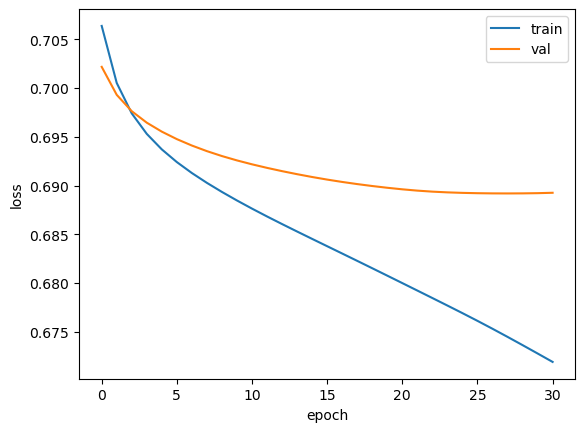

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [35]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 100}

In [36]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


ValueError: Sequential model sequential_5 cannot be built because it has no layers. Call `model.add(layer)`.

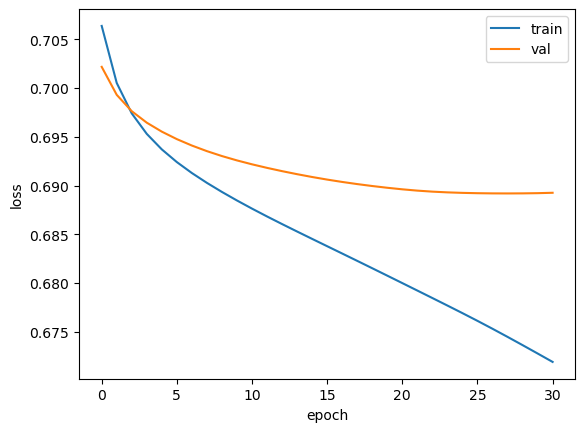

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [38]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [40]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 100}

In [41]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


ValueError: Sequential model sequential_6 cannot be built because it has no layers. Call `model.add(layer)`.

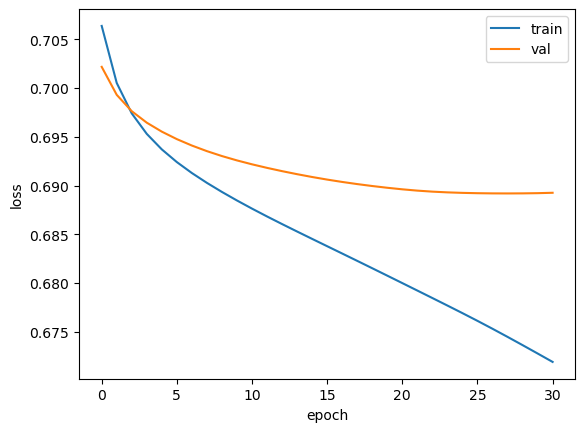

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [43]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 100}

In [44]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


ValueError: Sequential model sequential_7 cannot be built because it has no layers. Call `model.add(layer)`.

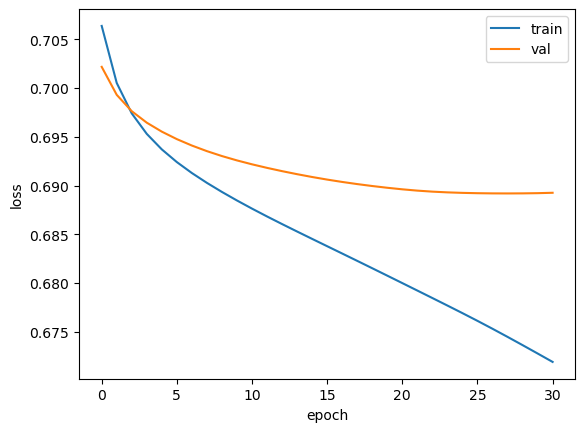

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [46]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))
model3.summary()

ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 100}

In [47]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


ValueError: Sequential model sequential_8 cannot be built because it has no layers. Call `model.add(layer)`.

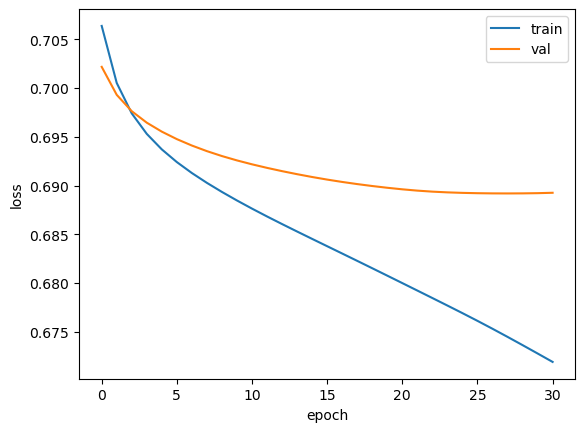

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [49]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))
model4.summary()

ValueError: Unrecognized keyword arguments passed to Embedding: {'input_length': 100}

In [50]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


ValueError: Sequential model sequential_9 cannot be built because it has no layers. Call `model.add(layer)`.

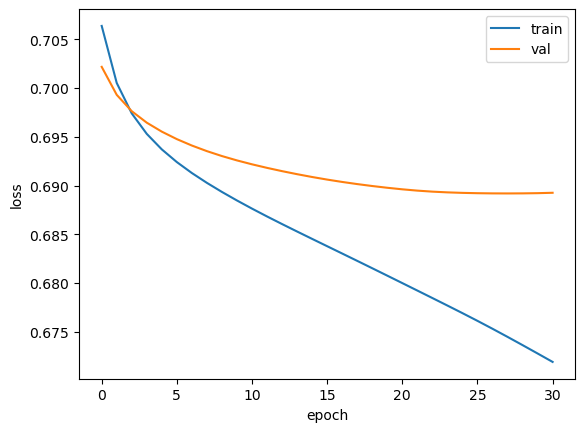

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [52]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.keras')
rnn_model.evaluate(test_seq, test_target)

ValueError: File not found: filepath=best-2rnn-model.keras. Please ensure the file is an accessible `.keras` zip file.